In [62]:
# 加载画图包
%config InlineBackend.figure_format = 'retina'

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
import matplotlib as mpl
import matplotlib.patches as mp
import seaborn as sns

# 设置全局字体
font_dirs = ["/public/home/mowp/test/fonts/"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
    
plt.rcParams["font.family"] = "Arial"
plt.rcParams['font.size'] = 12
plt.rcParams['svg.fonttype'] = 'none'

In [63]:
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
import sys
sys.path.append('/public1/mowp/workspace/nanopore_modification/scripts/')
%aimport metaplot
%aimport utils

In [65]:
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter

# CEN180

In [495]:
infile = '/data/Zhaijx/mowp/db/col-CEN/bed/ColCEN_CEN180.bed'
cen180_site = pd.read_csv(infile, sep='\t', names=['chr', 'start', 'end', 'name', 'score', 'strand'])

cen180_site = cen180_site.pipe(
    lambda df: df.assign(
        cen180_start = np.select(
            [df['strand'] == '+', df['strand'] == '-'],
            [df['start'], df['end']],
            None
        )
    )
)

cen180_site = cen180_site[['chr', 'cen180_start', 'strand']].to_numpy()

In [496]:
cen180_site

array([['Chr1', 14377364, '-'],
       ['Chr1', 14377543, '-'],
       ['Chr1', 14377713, '-'],
       ...,
       ['Chr5', 14551395, '+'],
       ['Chr5', 14551573, '+'],
       ['Chr5', 14551808, '+']], dtype=object)

### Accessibility

In [498]:
infile = '/data/Zhaijx/mowp/data/stam_seq_col_CEN/20221029_col_m6A/6ma_results/bw_files/20221029_col_m6A.6mA.q2.bw'

bins = 2
b = 178*6
a = 178*6
wt1005_m6a_cen = metaplot.bw_reference_point(infile, cen180_site,
    before=b, after=a, bins=bins, 
    exclude_chr={'Pt', 'Mt'}, normalized='counts',
)

n = 66131


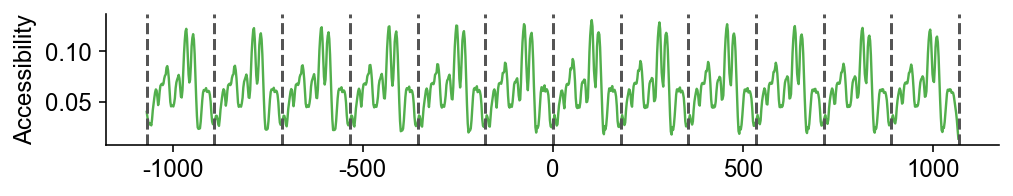

In [499]:
plt.figure(figsize=(8, 1.2))
plt.plot(savgol_filter(wt1005_m6a_cen/100, 11, 2), lw=1.2, color='#52af4c')

plt.xticks(
    [(b-1000)//bins, (b-500)//bins, b//bins, (b+500)//bins, (b+1000)//bins], 
    [-1000, -500, 0, 500, 1000], rotation=0)
for i in np.arange(0, 178*13//bins, 178 //bins):
    plt.axvline(i, ls='--', color='#555555')

plt.ylabel('Accessibility')
# plt.ylim(0)
sns.despine(top=True, right=True)

### mCG

In [500]:
infile = '/data/Zhaijx/mowp/data/stam_seq_col_CEN/20221029_col_m6A/5mc_results/frequency/20221029_col_m6A.C.call_mods.CG.frequency.bw'

bins = 2
b = 178*6
a = 178*6
wt1005_mcg_cen = metaplot.bw_reference_point(infile, cen180_site,
    before=b, after=a, bins=bins, 
    exclude_chr={'Pt', 'Mt'}, normalized='counts',
)

n = 66131


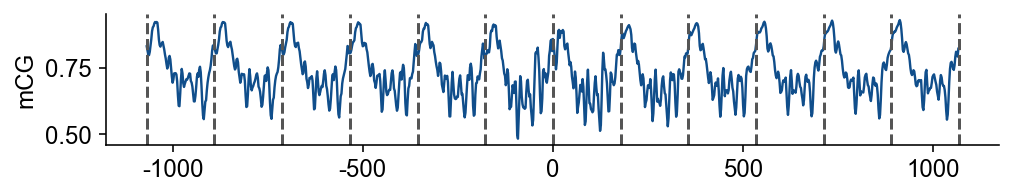

In [501]:
plt.figure(figsize=(8, 1.2))
plt.plot(savgol_filter(wt1005_mcg_cen, 11, 5), lw=1.2, color='#104e8b')

plt.xticks(
    [(b-1000)//bins, (b-500)//bins, b//bins, (b+500)//bins, (b+1000)//bins], 
    [-1000, -500, 0, 500, 1000], rotation=0)
for i in np.arange(0, 178*13//bins, 178 //bins):
    plt.axvline(i, ls='--', color='#555555')

plt.ylabel('mCG')
# plt.ylim(.25, 1)
sns.despine(top=True, right=True)

### mCHG

In [502]:
infile = '/data/Zhaijx/mowp/data/stam_seq_col_CEN/20221029_col_m6A/5mc_results/frequency/20221029_col_m6A.C.call_mods.CHG.frequency.bw'

bins = 2
b = 178*6
a = 178*6
wt1005_mchg_cen = metaplot.bw_reference_point(infile, cen180_site,
    before=b, after=a, bins=bins, 
    exclude_chr={'Pt', 'Mt'}, normalized='counts',
)

n = 66131


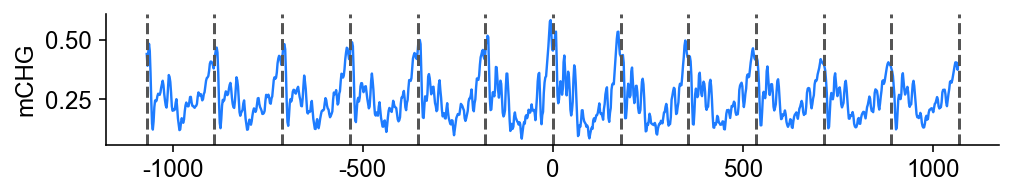

In [503]:
plt.figure(figsize=(8, 1.2))
plt.plot(savgol_filter(wt1005_mchg_cen, 11, 5), lw=1.2, color='#1e7cff')

plt.xticks(
    [(b-1000)//bins, (b-500)//bins, b//bins, (b+500)//bins, (b+1000)//bins], 
    [-1000, -500, 0, 500, 1000], rotation=0)
for i in np.arange(0, 178*13//bins, 178 //bins):
    plt.axvline(i, ls='--', color='#555555')

plt.ylabel('mCHG')
# plt.ylim(.25, 1)
sns.despine(top=True, right=True)

### mCHH

In [504]:
infile = '/data/Zhaijx/mowp/data/stam_seq_col_CEN/20221029_col_m6A/5mc_results/frequency/20221029_col_m6A.C.call_mods.CHH.frequency.bw'

bins = 2
b = 178*6
a = 178*6
wt1005_mchh_cen = metaplot.bw_reference_point(infile, cen180_site,
    before=b, after=a, bins=bins, 
    exclude_chr={'Pt', 'Mt'}, normalized='counts',
)

n = 66131


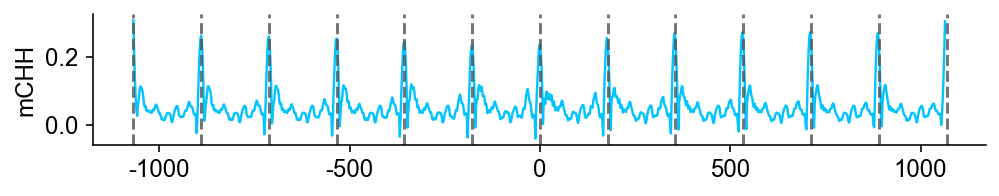

In [505]:
plt.figure(figsize=(8, 1.2))
plt.plot(savgol_filter(wt1005_mchh_cen[:-1], 11, 2), lw=1.2, color='#03c4ff')

plt.xticks(
    [(b-1000)//bins, (b-500)//bins, b//bins, (b+500)//bins, (b+1000)//bins], 
    [-1000, -500, 0, 500, 1000], rotation=0)

for i in np.arange(0, 178*13//bins, 178 //bins):
    plt.axvline(i, ls='--', color='#555555', alpha=.8)

plt.ylabel('mCHH')
# plt.ylim(.25, 1)
sns.despine(top=True, right=True)

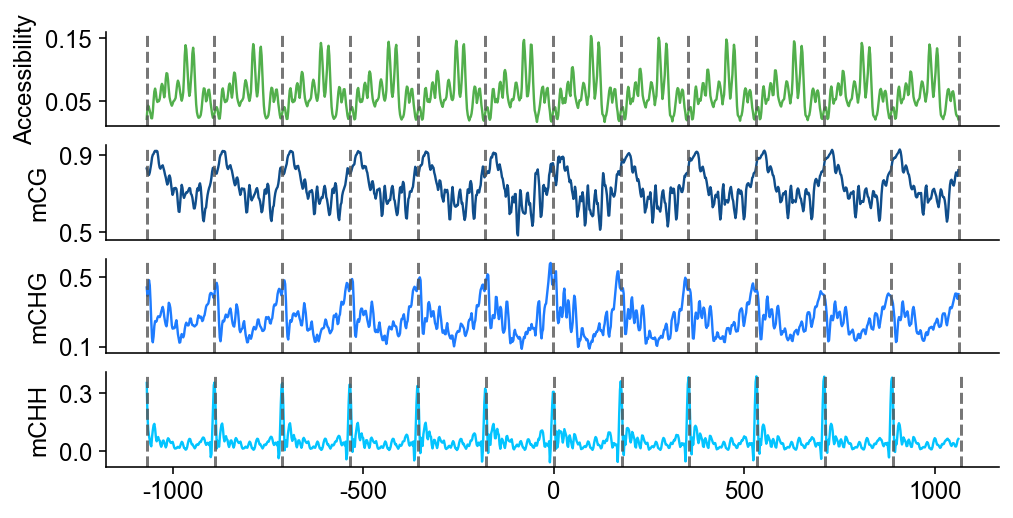

In [506]:
def plot_cen_epi(ax, data, color: str = None, show_xaxis: bool=False, ylabel: str=None, yticks: tuple=None):
    ax.plot(savgol_filter(data, 11, 5), lw=1.2, color=color)
    for i in np.arange(0, 178*13//bins, 178 //bins):
        ax.axvline(i, ls='--', color='#555555', alpha=.8)
    
    ax.set_ylabel(ylabel)
    if yticks is not None:
        ax.set_yticks(yticks)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    if not show_xaxis:
        ax.xaxis.set_major_locator(ticker.NullLocator())
    

fig, ax = plt.subplots(ncols=1, nrows=4, figsize=(8, 4))

plot_cen_epi(ax[0], wt1005_m6a_cen/100, color='#52af4c', ylabel='Accessibility', yticks=(.05, .15))
plot_cen_epi(ax[1], wt1005_mcg_cen, color='#104e8b', ylabel='mCG', yticks=(.5, .9))
plot_cen_epi(ax[2], wt1005_mchg_cen, color='#1e7cff', ylabel='mCHG', yticks=(.1, .5))
plot_cen_epi(ax[3], wt1005_mchh_cen[:-2], color='#03c4ff', show_xaxis=True, ylabel='mCHH', yticks=(0, .3))

plt.xticks(
    [(b-1000)//bins, (b-500)//bins, b//bins, (b+500)//bins, (b+1000)//bins], 
    [-1000, -500, 0, 500, 1000], rotation=0);

# ATHILA 

In [553]:
infile = '/data/Zhaijx/mowp/db/col-CEN/bed/cen_region.bed'
cen_region = {}
with open(infile, 'r') as f:
    for line in f:
        line = line.strip().split('\t')
        cen_region[line[0]] = (int(line[1]), int(line[2]))

In [554]:
def within_cen(x):
    if x.start-1 >= cen_region[x.chr][0] and x.end <= cen_region[x.chr][1]:
        return True
    else:
        return False

In [555]:
infile = '/data/Zhaijx/mowp/db/col-CEN/bed/ColCEN_ATHILA.bed'
df = pd.read_csv(infile, sep='\t', names=['chr', 'start', 'end', 'name', 'score', 'strand'], usecols=[0, 1, 2, 3, 4, 5])

boo = df.apply(within_cen, axis=1)
athila_region = df[boo][['chr', 'start', 'end', 'strand']].to_numpy()  # within CEN region

In [556]:
bins = 50
b = 2000
a = 2000
m = 2000

infile = '/data/Zhaijx/mowp/data/stam_seq_col_CEN/20221005_col_shoot/6ma_results/bw_files/20221005_col_shoot.6mA.q2.bw'
infile = '/data/Zhaijx/mowp/data/stam_seq_col_CEN/20221029_col_m6A/6ma_results/bw_files/20221029_col_m6A.6mA.q2.bw'

wt1005_m6A_cov = metaplot.bw_scale_regions(
    infile, athila_region,
    before=b, after=a, regionbody=m, bins=bins,
    exclude_chr={'Pt', 'Mt'},
    normalized='counts',
    return_raw=False
)

n = 54


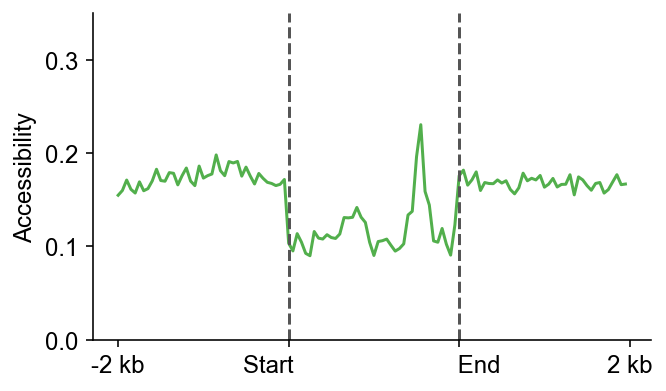

In [558]:
plt.figure(figsize=(5, 3))
plt.plot(wt1005_m6A_cov/100/wt1005_chrc, color='#52af4c', label='wt1005')

plt.xticks([0, b//bins, (b+m)//bins, (a+b+m)//bins], [f'-{b//1000} kb', 'Start      ', '      End', f'{a//1000} kb'], rotation=0)
plt.axvline(b//bins, ls='--', color='#555555')
plt.axvline((b+m)//bins, ls='--', color='#555555')

plt.ylabel('Accessibility')
# plt.legend(frameon=False, bbox_to_anchor=(1.05, 1))
plt.ylim(0, .35)
sns.despine(top=True, right=True)

In [519]:
bins = 50
b = 2000
a = 2000
m = 2000

infile = '/data/Zhaijx/mowp/data/stam_seq_col_CEN/20221029_col_m6A/5mc_results/frequency/20221029_col_m6A.C.call_mods.CG.frequency.bw'
wt1005_mcg_cov = metaplot.bw_scale_regions(
    infile, athila_region,
    before=b, after=a, regionbody=m, bins=bins,
    exclude_chr={'Pt', 'Mt'},
    normalized='counts',
    return_raw=False
)

infile = '/data/Zhaijx/mowp/data/stam_seq_col_CEN/20221029_col_m6A/5mc_results/frequency/20221029_col_m6A.C.call_mods.CHG.frequency.bw'
wt1005_mchg_cov = metaplot.bw_scale_regions(
    infile, athila_region,
    before=b, after=a, regionbody=m, bins=bins,
    exclude_chr={'Pt', 'Mt'},
    normalized='counts',
    return_raw=False
)

infile = '/data/Zhaijx/mowp/data/stam_seq_col_CEN/20221029_col_m6A/5mc_results/frequency/20221029_col_m6A.C.call_mods.CHH.frequency.bw'
wt1005_mchh_cov = metaplot.bw_scale_regions(
    infile, athila_region,
    before=b, after=a, regionbody=m, bins=bins,
    exclude_chr={'Pt', 'Mt'},
    normalized='counts',
    return_raw=False
)

n = 54
n = 54
n = 54


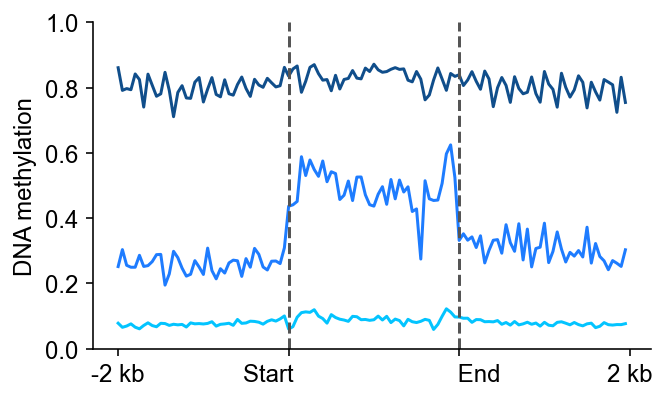

In [520]:
plt.figure(figsize=(5, 3))
plt.plot(wt1005_mcg_cov, color='#104e8b', label='mCG')
plt.plot(wt1005_mchg_cov, color='#1e7cff', label='mCHG')
plt.plot(wt1005_mchh_cov, color='#03c4ff', label='mCHH')

plt.xticks([0, b//bins, (b+m)//bins, (a+b+m)//bins], [f'-{b//1000} kb', 'Start      ', '      End', f'{a//1000} kb'], rotation=0)
plt.axvline(b//bins, ls='--', color='#555555')
plt.axvline((b+m)//bins, ls='--', color='#555555')

plt.ylabel('DNA methylation')
# plt.legend(frameon=False, bbox_to_anchor=(.95, 1.1))
plt.ylim(0, 1)
sns.despine(top=True, right=True)